NSX Mart is a Shopping Complex that operates through all total of 16 stores.

The festival season represents a critical period for retail businesses, characterized by a significant surge in customer footfall and spending. NSX Mart experiences this annual influx, presenting both opportunities and challenges. To capitalize on this period effectively, it is essential to understand the unique shopping behaviors and spending patterns of customers during the festive season.

Based on previous Diwali season sales, the management seeks to gain deeper insights into its customers' purchasing habits to enhance its service offerings, optimize marketing strategies, and ultimately drive sales growth. 

This project aims to uncover valuable patterns and trends that can inform data-driven decisions. The analysis will focus on various aspects such as customer demographics, spending scores, product preferences, and temporal sales trends.

Through statistical analysis & visualization, we will identify key customer segments, analyze their behaviors, and provide actionable insights. Understanding customer behavior and spending patterns is crucial for business success. This comprehensive EDA will serve as a foundational step in enhancing customer satisfaction and boosting the mall's overall performance.


**FETCHING DATASET**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("DiwaliSalesData.csv", encoding="latin-1")

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# DATA PRE-PROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#Droping Blank Columns

df=df.drop(["Status","unnamed1"],axis=1)

In [6]:
#Droping Null Values from the Dataset

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
#Renaming "Maarital_Status" column Values

df["Marital_Status"]=df["Marital_Status"].astype(str).str.replace("0","Unmarried")
df["Marital_Status"]=df["Marital_Status"].astype(str).str.replace("1","Married")

In [9]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206.0


In [10]:
#Renaming "Gender" column Values

df["Gender"]=df["Gender"].str.replace("F","Female")
df["Gender"]=df["Gender"].str.replace("M","Male")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,Male,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,Male,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,Female,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,Male,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206.0


In [11]:
#Renaming the "Cust_name" column

df.rename(columns={"Cust_name":"Customers"}, inplace=True)

In [12]:
#Changing the Datatype of "Amount" column

df["Amount"]=df["Amount"].astype(int)

In [13]:
df["Amount"]

0        23952
1        23934
2        23924
3        23912
4        23877
         ...  
11246      370
11247      367
11248      213
11249      206
11250      188
Name: Amount, Length: 11239, dtype: int32

# DATA VISUALIZATION

In [14]:
df.columns

Index(['User_ID', 'Customers', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

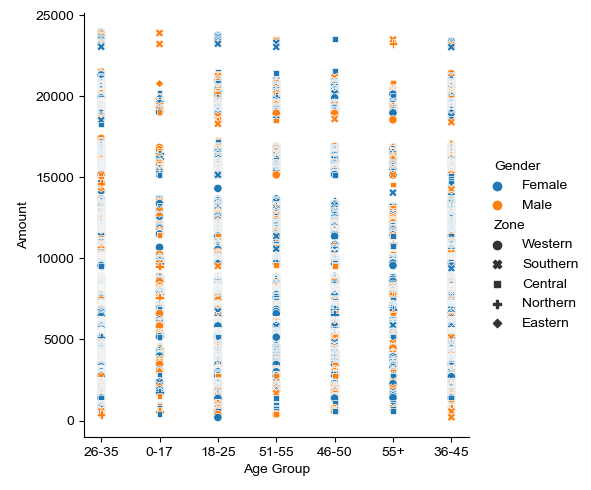

In [15]:
sns.relplot(x="Age Group", y="Amount", kind="scatter",hue="Gender",style="Zone", data=df)
sns.set(rc={'figure.figsize':(20,15)})

*The above plot shows the data about the customers on the basis of Gender and Zone with respect to Amount*

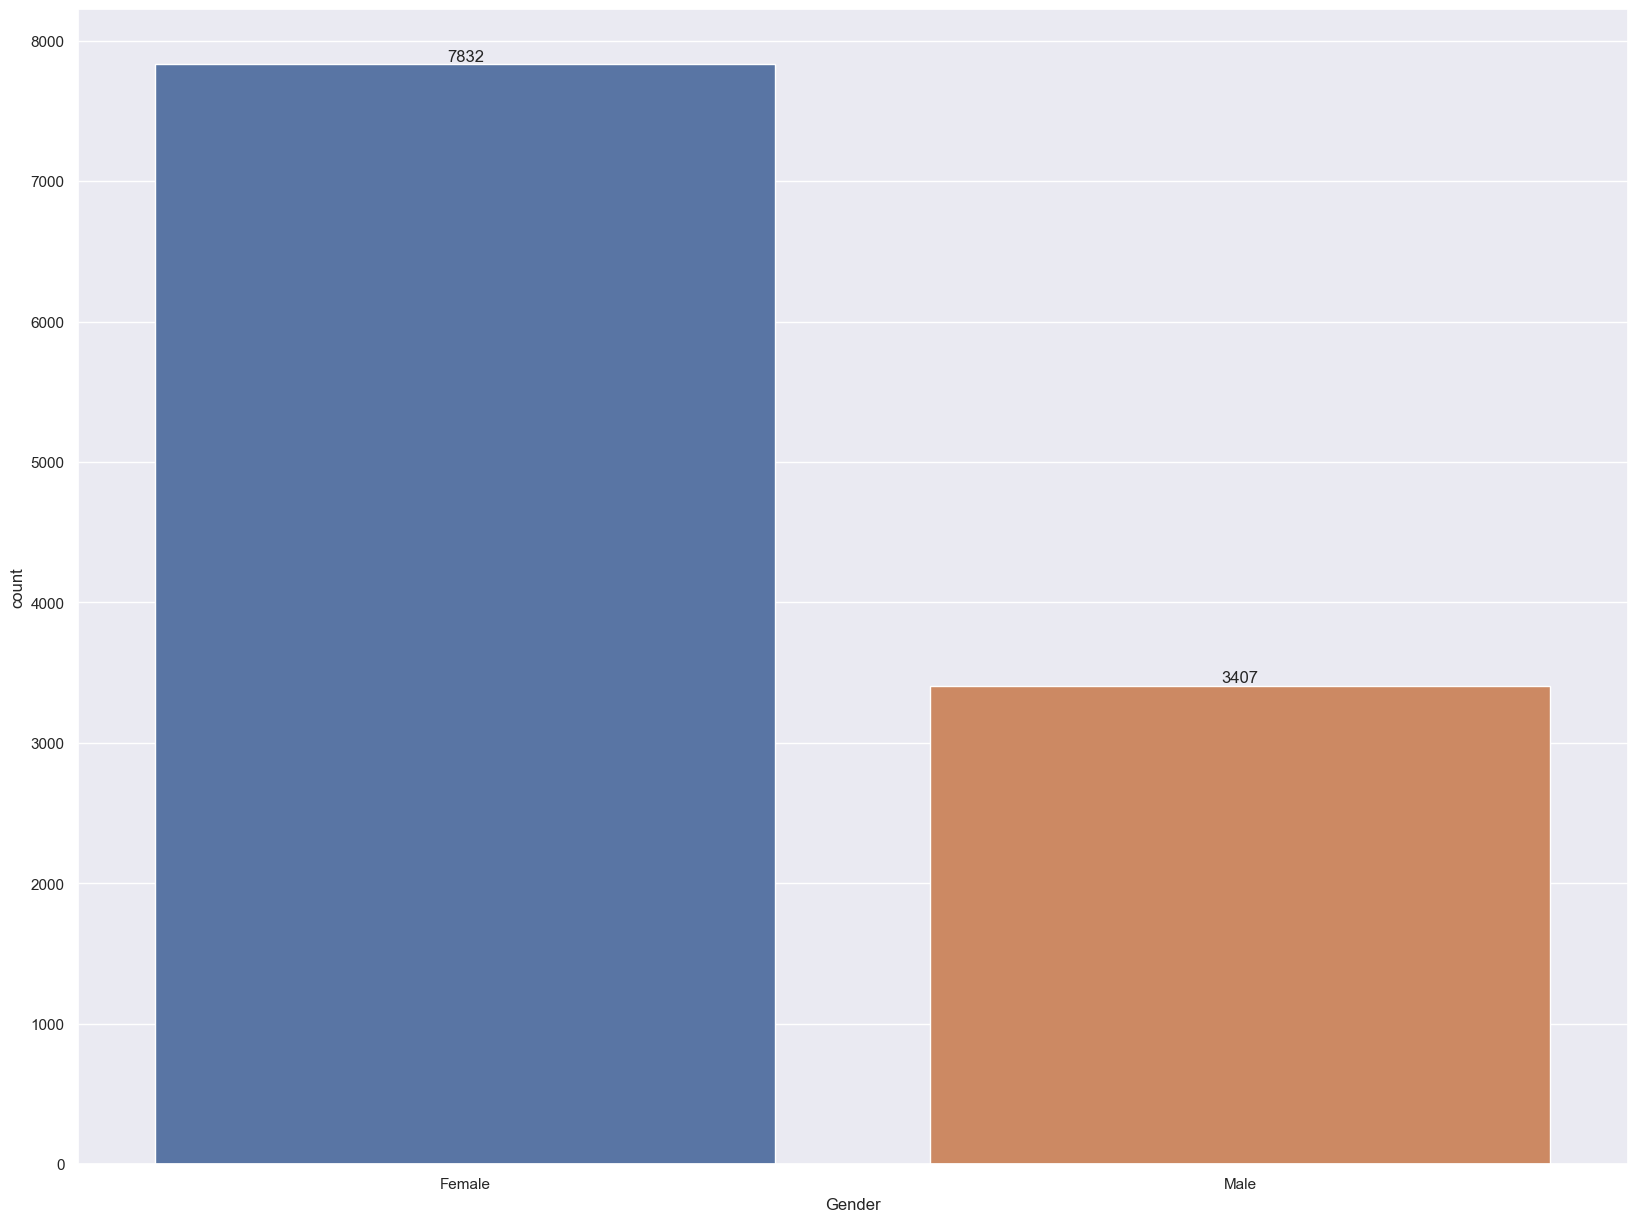

In [16]:
#Count VS Gender

aa=sns.countplot(x="Gender", data=df)
for bars in aa.containers:
    aa.bar_label(bars)
sns.set(rc={'figure.figsize':(20,10)})

*The above visualization shows that most of the buyers are females*

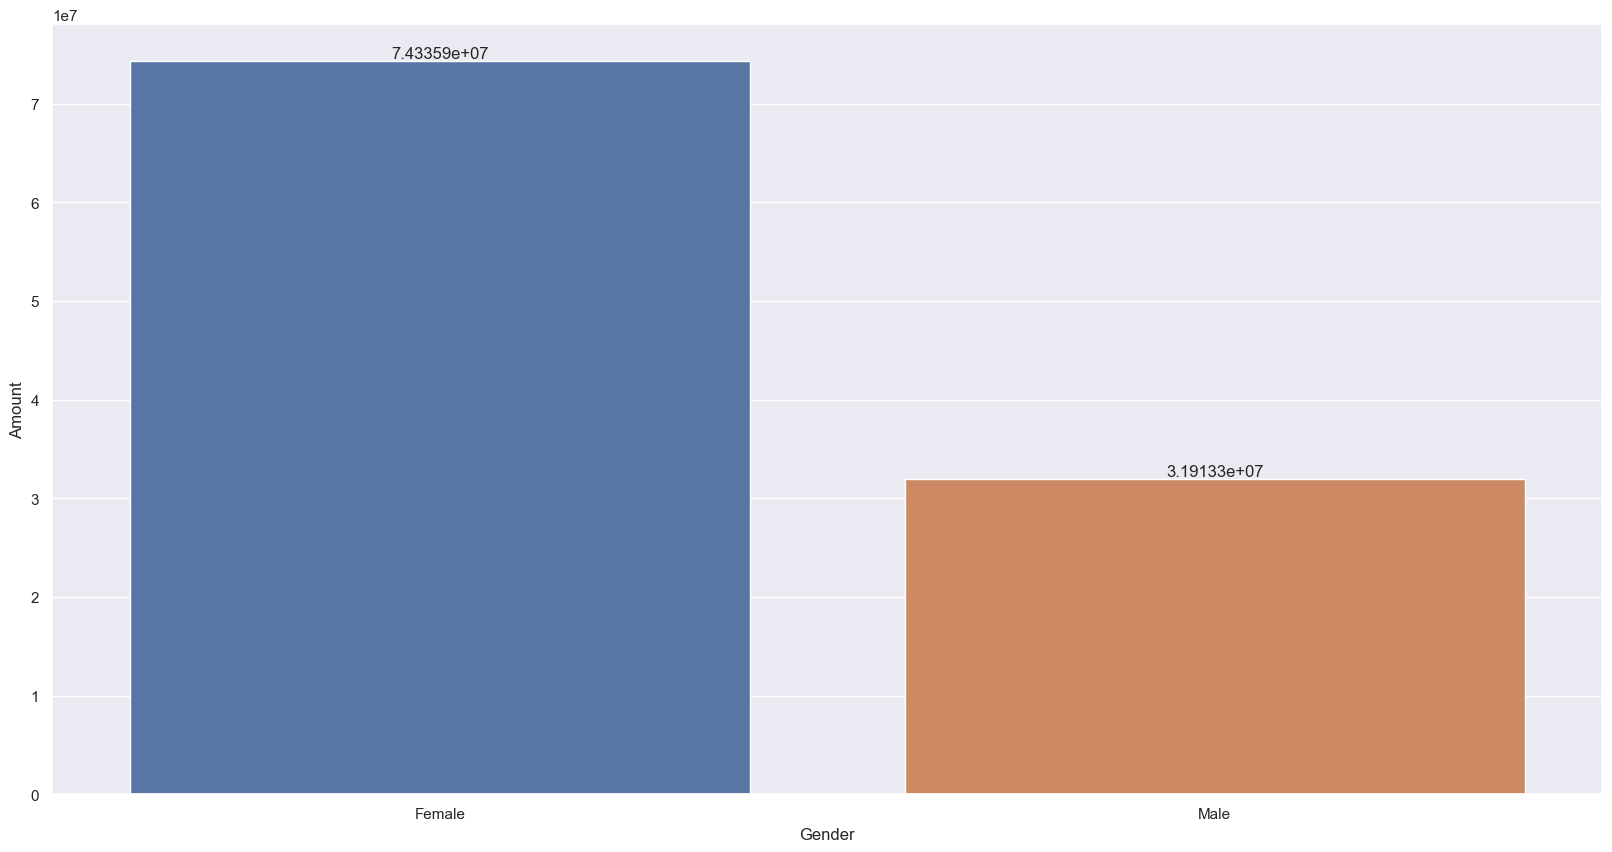

In [17]:
#Amount VS Gender

amtgen= df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ab=sns.barplot(x = 'Gender',y= 'Amount' ,data = amtgen)
for bars in ab.containers:
    ab.bar_label(bars)
sns.set(rc={'figure.figsize':(20,10)})

*The above visualization shows that purchasing power of females are greater than men*

In [18]:
df["Gender"].value_counts()
#df["Gender"].value_counts(normalize=True)

Gender
Female    7832
Male      3407
Name: count, dtype: int64

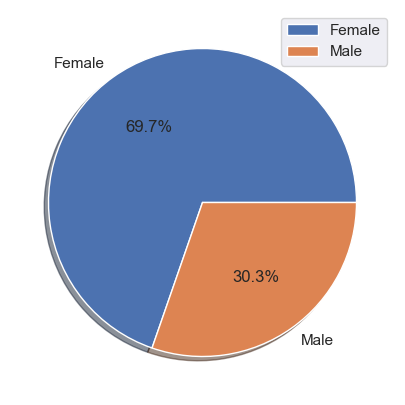

In [19]:
#Order % based on Gender

a1=df["Gender"].value_counts().index
a2=df["Gender"].value_counts().values

sns.set(rc={'figure.figsize':(8,5)})
plt.pie(a2,labels=a1,explode=(0,0),shadow=True, autopct="%1.1f%%")
plt.legend(loc=1)

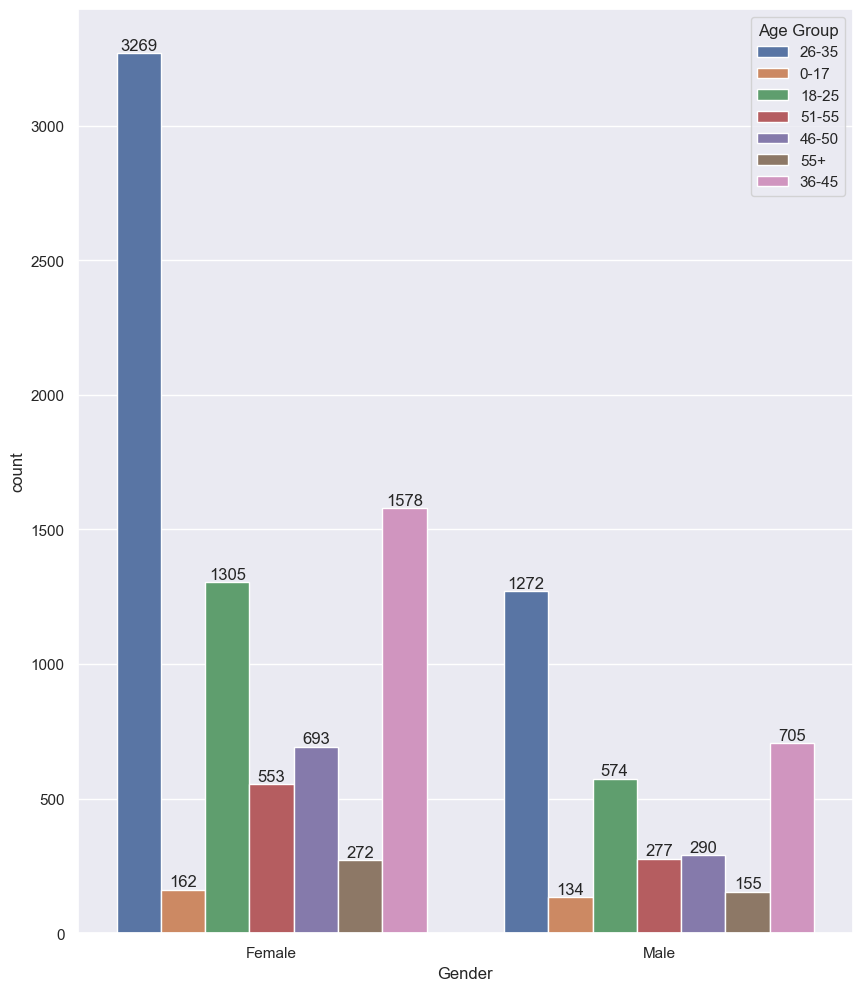

In [49]:
#Count VS Gender&Age Group

ac=sns.countplot(x="Gender", hue="Age Group", data=df)

sns.set(rc={'figure.figsize':(20,12)})
for bars in ac.containers:
    ac.bar_label(bars)

*The above pie chart shows that almost 70% of orders have been done by females*

*The above graph shows that most of the buyers are of Age Group b/w 26-35 years, among all age groups.* 

*Even if we see gender-wise then also the customers of 26-35 years age group are most of the buyers, in both male and female.*

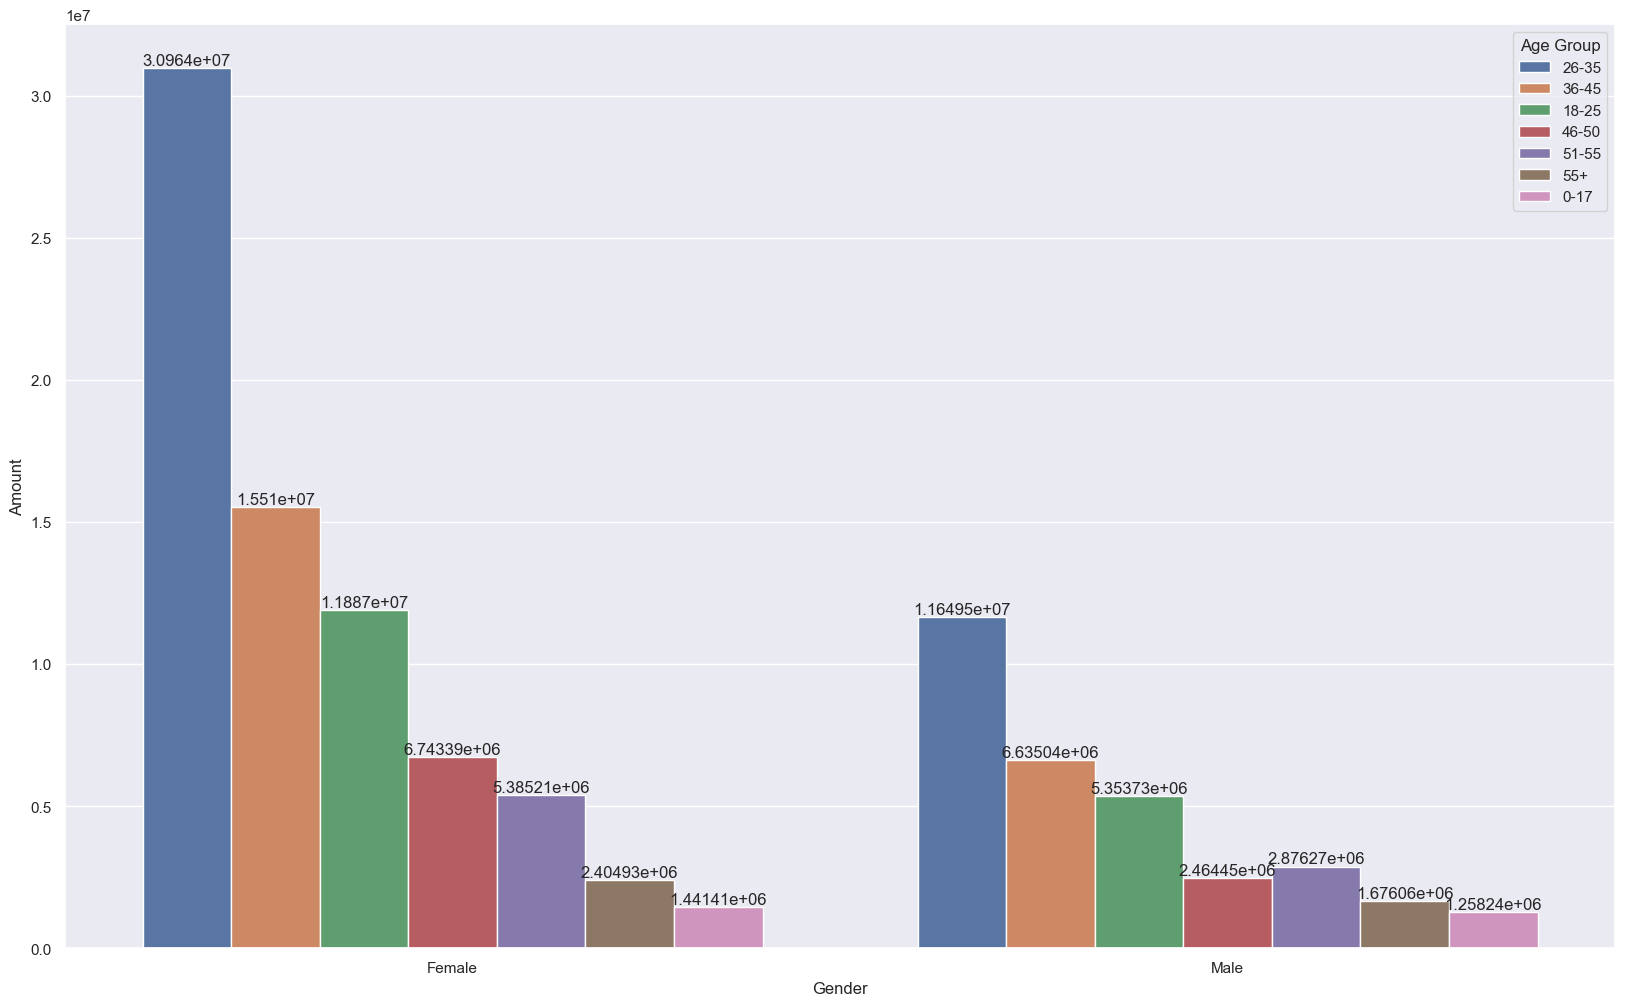

In [21]:
#Amount VS Gender&Age Group

amtmarital=df.groupby(["Gender", "Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

ag=sns.barplot(x="Gender", y="Amount",hue="Age Group", data=amtmarital)
for bars in ag.containers:
    ag.bar_label(bars)
sns.set(rc={'figure.figsize':(35,25)})

*The above graph shows that the customers of 26-35 years age group in female have the maximum purchasing power among all age groups.*

*Even if we see gender-wise, the customers of 26-35 years age group have the maximum purchasing power among all age groups, in both male and female.*

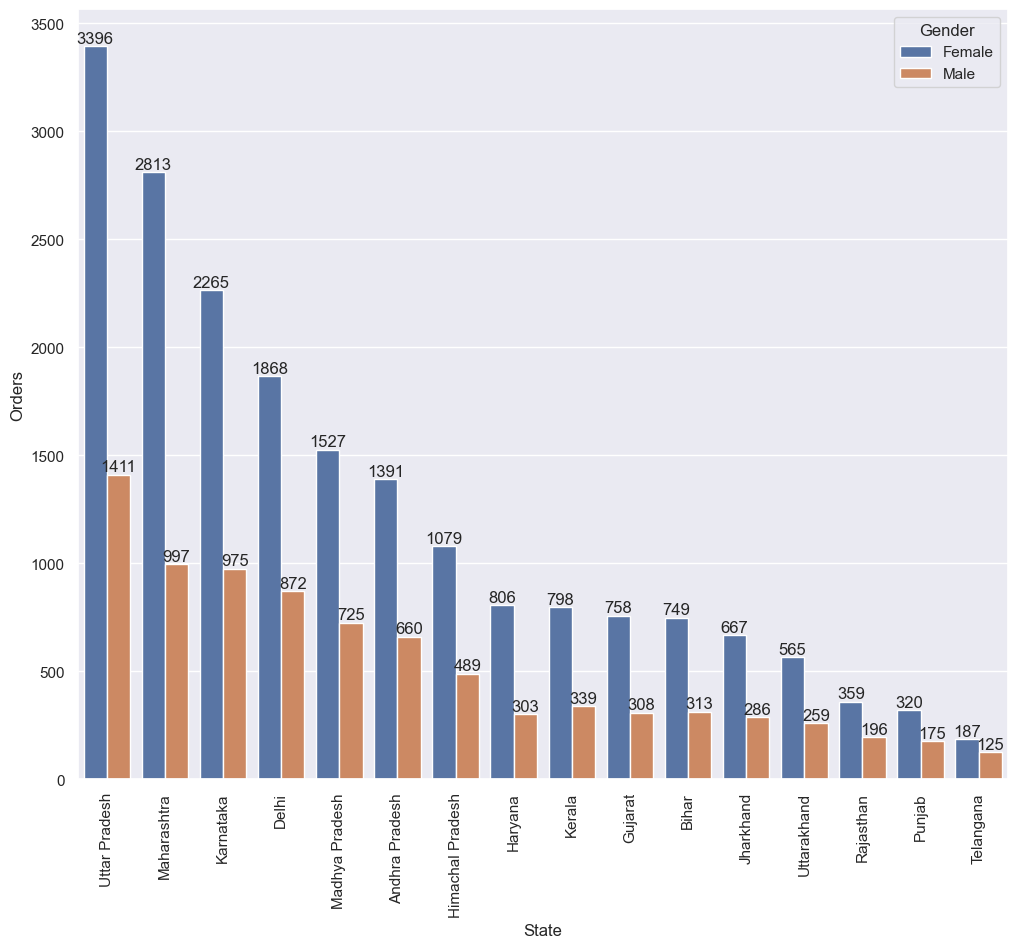

In [45]:
#Orders VS State

storder=df.groupby(["State","Gender"], as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)


ae=sns.barplot(x="State",y="Orders",hue="Gender", data=storder)
for bars in ae.containers:
    ae.bar_label(bars)
sns.set(rc={'figure.figsize':(10,12)})
plt.xticks(rotation=90)
plt.show()

*The above graph shows that from every state, females have done maximum of the orders as compared to men*

*UP, Maharashtra, Karnataka, Delhi, MP are the top 5 states in terms of maximum orders, accordingly. Jharkhand, Uttrakhand, Rajasthan, Punjab & Telangana are states with least orders (decreasingly)*

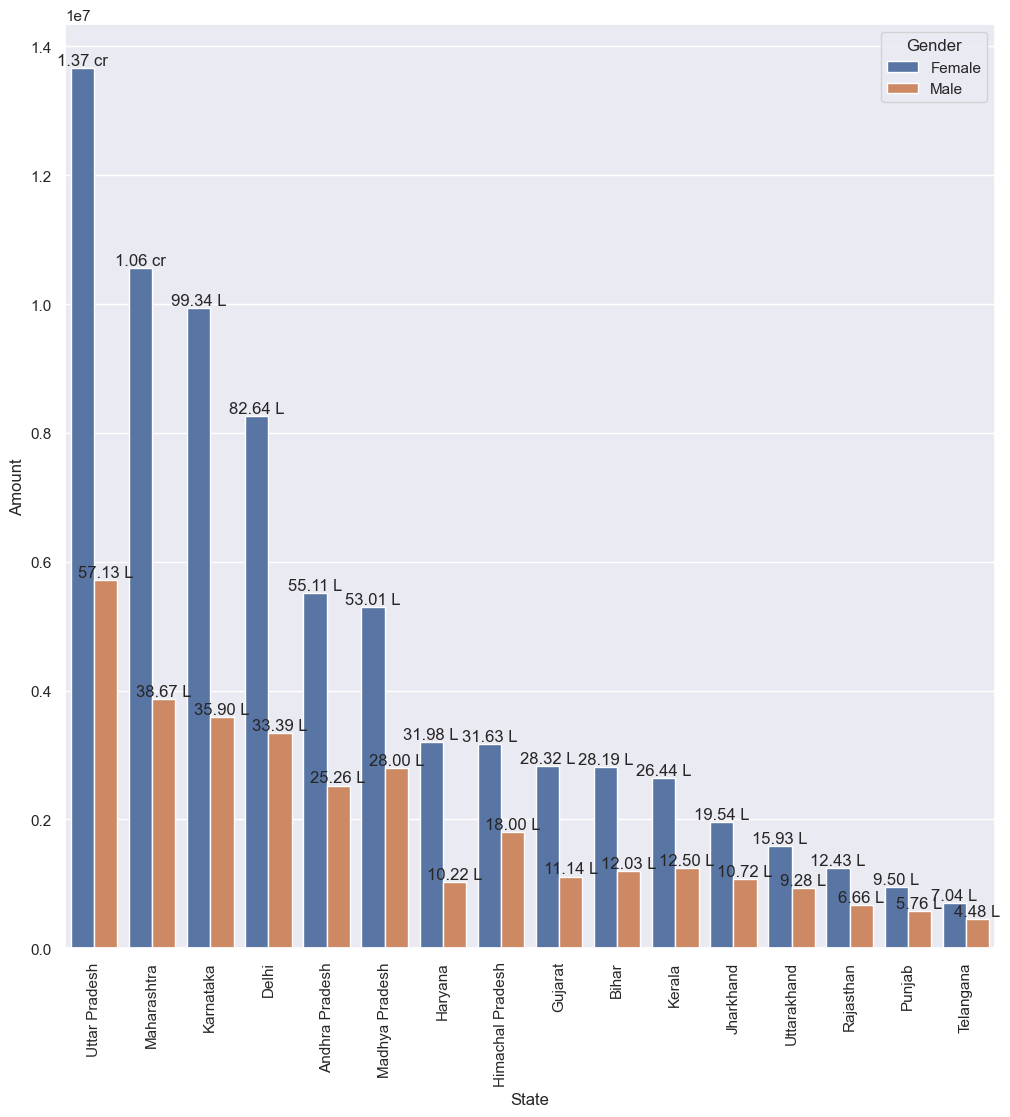

In [60]:
#Amount VS State

sstorder = df.groupby(["State", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 12))
af = sns.barplot(x="State", y="Amount", hue="Gender", data=sstorder)

# Function to format values in crores
def format_crore(value):
    return f'{value / 1e7:.2f} cr' if value >= 1e7 else f'{value/1e5:.2f} L'

# Add formatted bar labels
for bars in af.containers:
    labels = [format_crore(val) for val in bars.datavalues]
    af.bar_label(bars, labels=labels, label_type='edge')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.show()

*The above graph shows that from every state, the purchasing power of females is greater than men*


*UP, Maharashtra, Karnataka, Delhi, AP are the top 5 states in terms of Amount/purchasing, accordingly. Jharkhand, Uttrakhand, Rajasthan, Punjab & Telangana are states with least Amounts (decreasingly)*

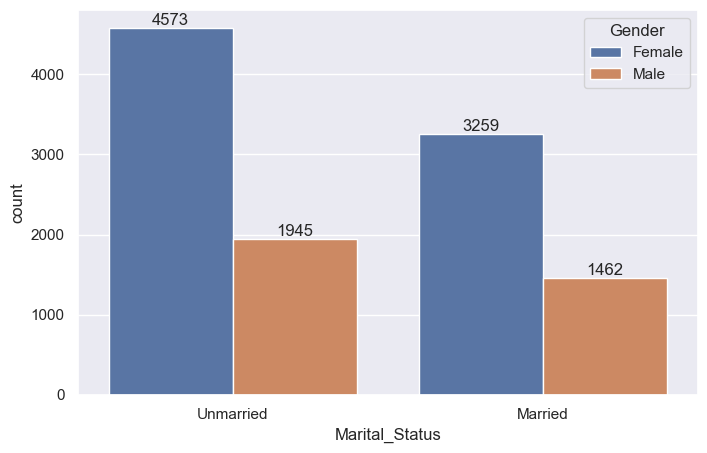

In [27]:
#Count VS Marital_Status

af=sns.countplot(x="Marital_Status",hue="Gender", data=df)

sns.set(rc={'figure.figsize':(10,5)})
for bars in af.containers:
    af.bar_label(bars)

*The above graph shows the ordering counts based on Marital status. Whether it be Married or Unmarried, females have done maximum orders as compared to men*

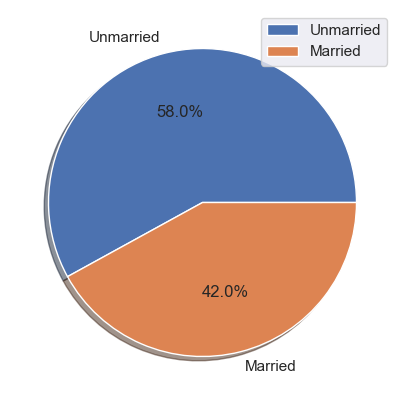

In [28]:
#Ordering % based on Marital_Status

b1=df["Marital_Status"].value_counts().index
b2=df["Marital_Status"].value_counts().values

sns.set(rc={'figure.figsize':(8,5)})
plt.pie(b2,labels=b1,explode=(0,0),shadow=True, autopct="%1.1f%%")
plt.legend(loc=1)

*The above Pie Chart shows that almost 60% of Orders have been placed by Unmarried customers*

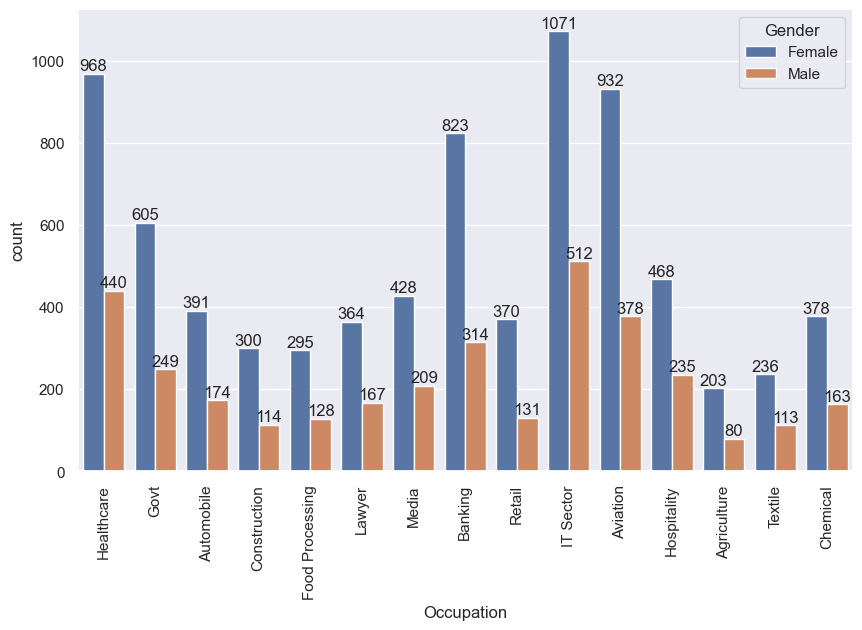

In [36]:
#Count VS Occupation

ah=sns.countplot(x="Occupation",hue="Gender", data=df)

for bars in ah.containers:
    ah.bar_label(bars)
sns.set(rc={'figure.figsize':(25,25)})

plt.xticks(rotation=90)
plt.show()


*The above graph shows that customers from IT Sector have placed most number of orders, whether it be male or female*

*The above graph shows that customers from Agriculture have placed least number of orders, whether it be male or female*

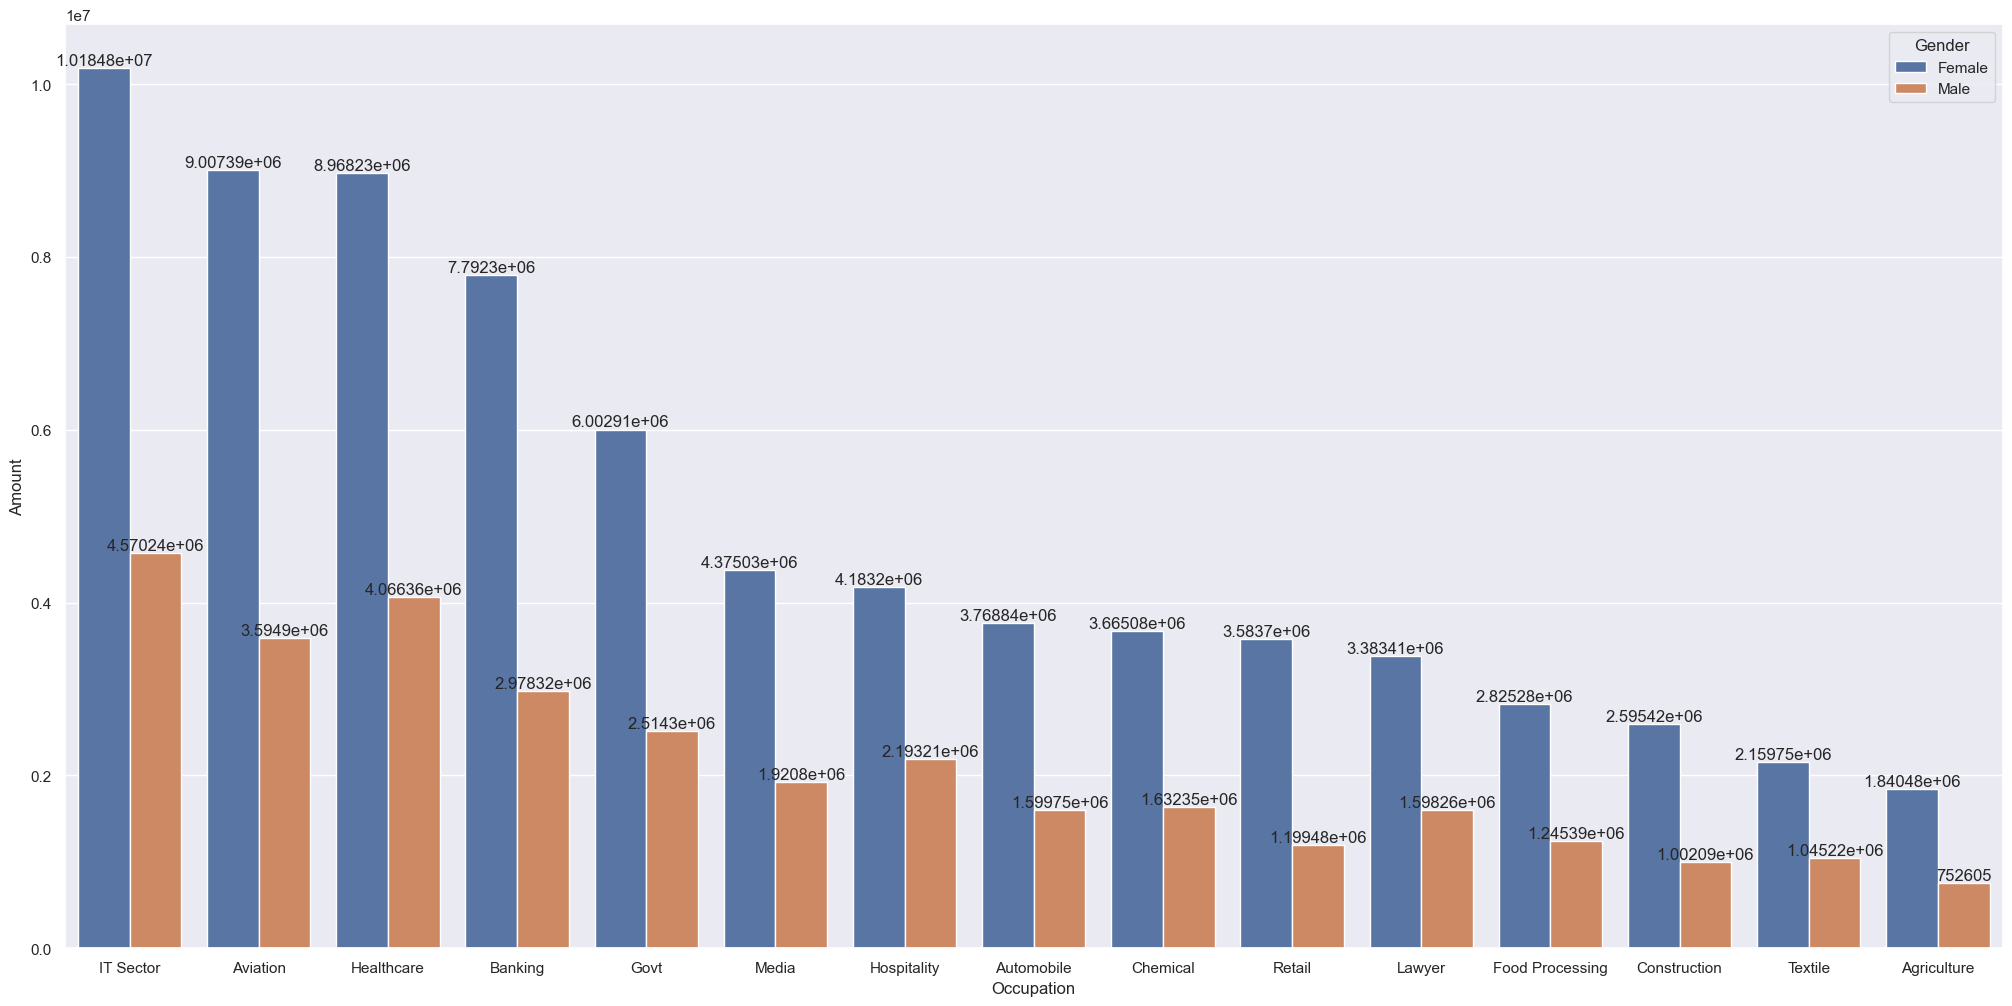

In [38]:
#Amount VS Occupation

amtocc=df.groupby(["Occupation","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

ai=sns.barplot(x="Occupation",y="Amount",hue="Gender", data=amtocc)

for bars in ai.containers:
    ai.bar_label(bars)
sns.set(rc={'figure.figsize':(12,12)})


*The above graph shows that customers from IT Sector have purchasing power greater than all other occupations, whether it be male or female*

*The above graph shows that customers from Agriculture have minimum purchasing power as compared to all other occupations, whether it be male or female*

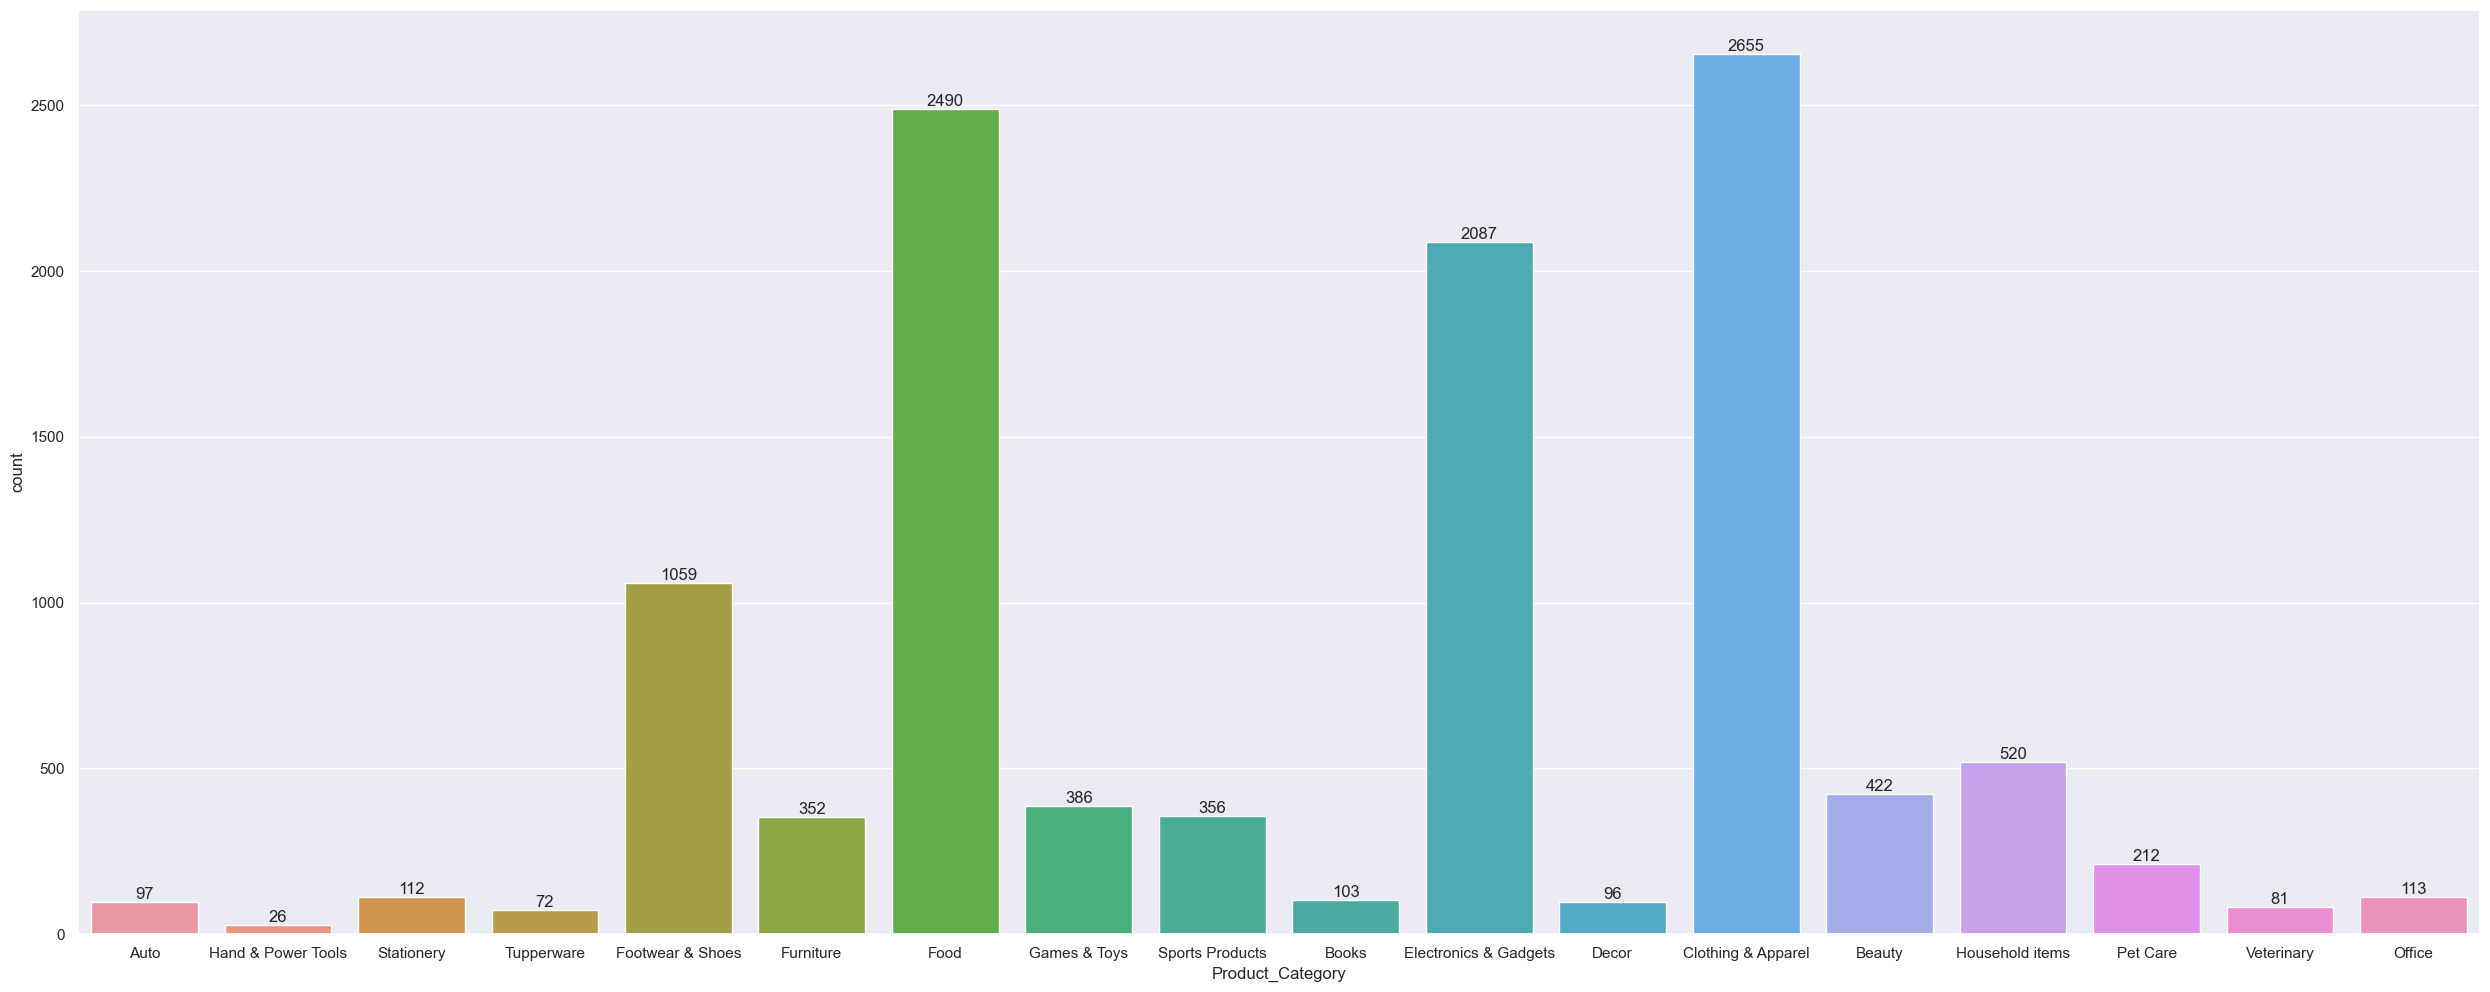

In [31]:
#Count VS Product_Category

aj=sns.countplot(x="Product_Category", data=df)
for bars in aj.containers:
    aj.bar_label(bars)
sns.set(rc={'figure.figsize':(31,12)})


*The top 5 most ordered Product categories are Clothing, Food, Electronics, Footwear & Households*

*The least 5 orderd Product categories are Hand&Power Tools, Tupperware, Veterinary, Decor, Auto. (Inly)*

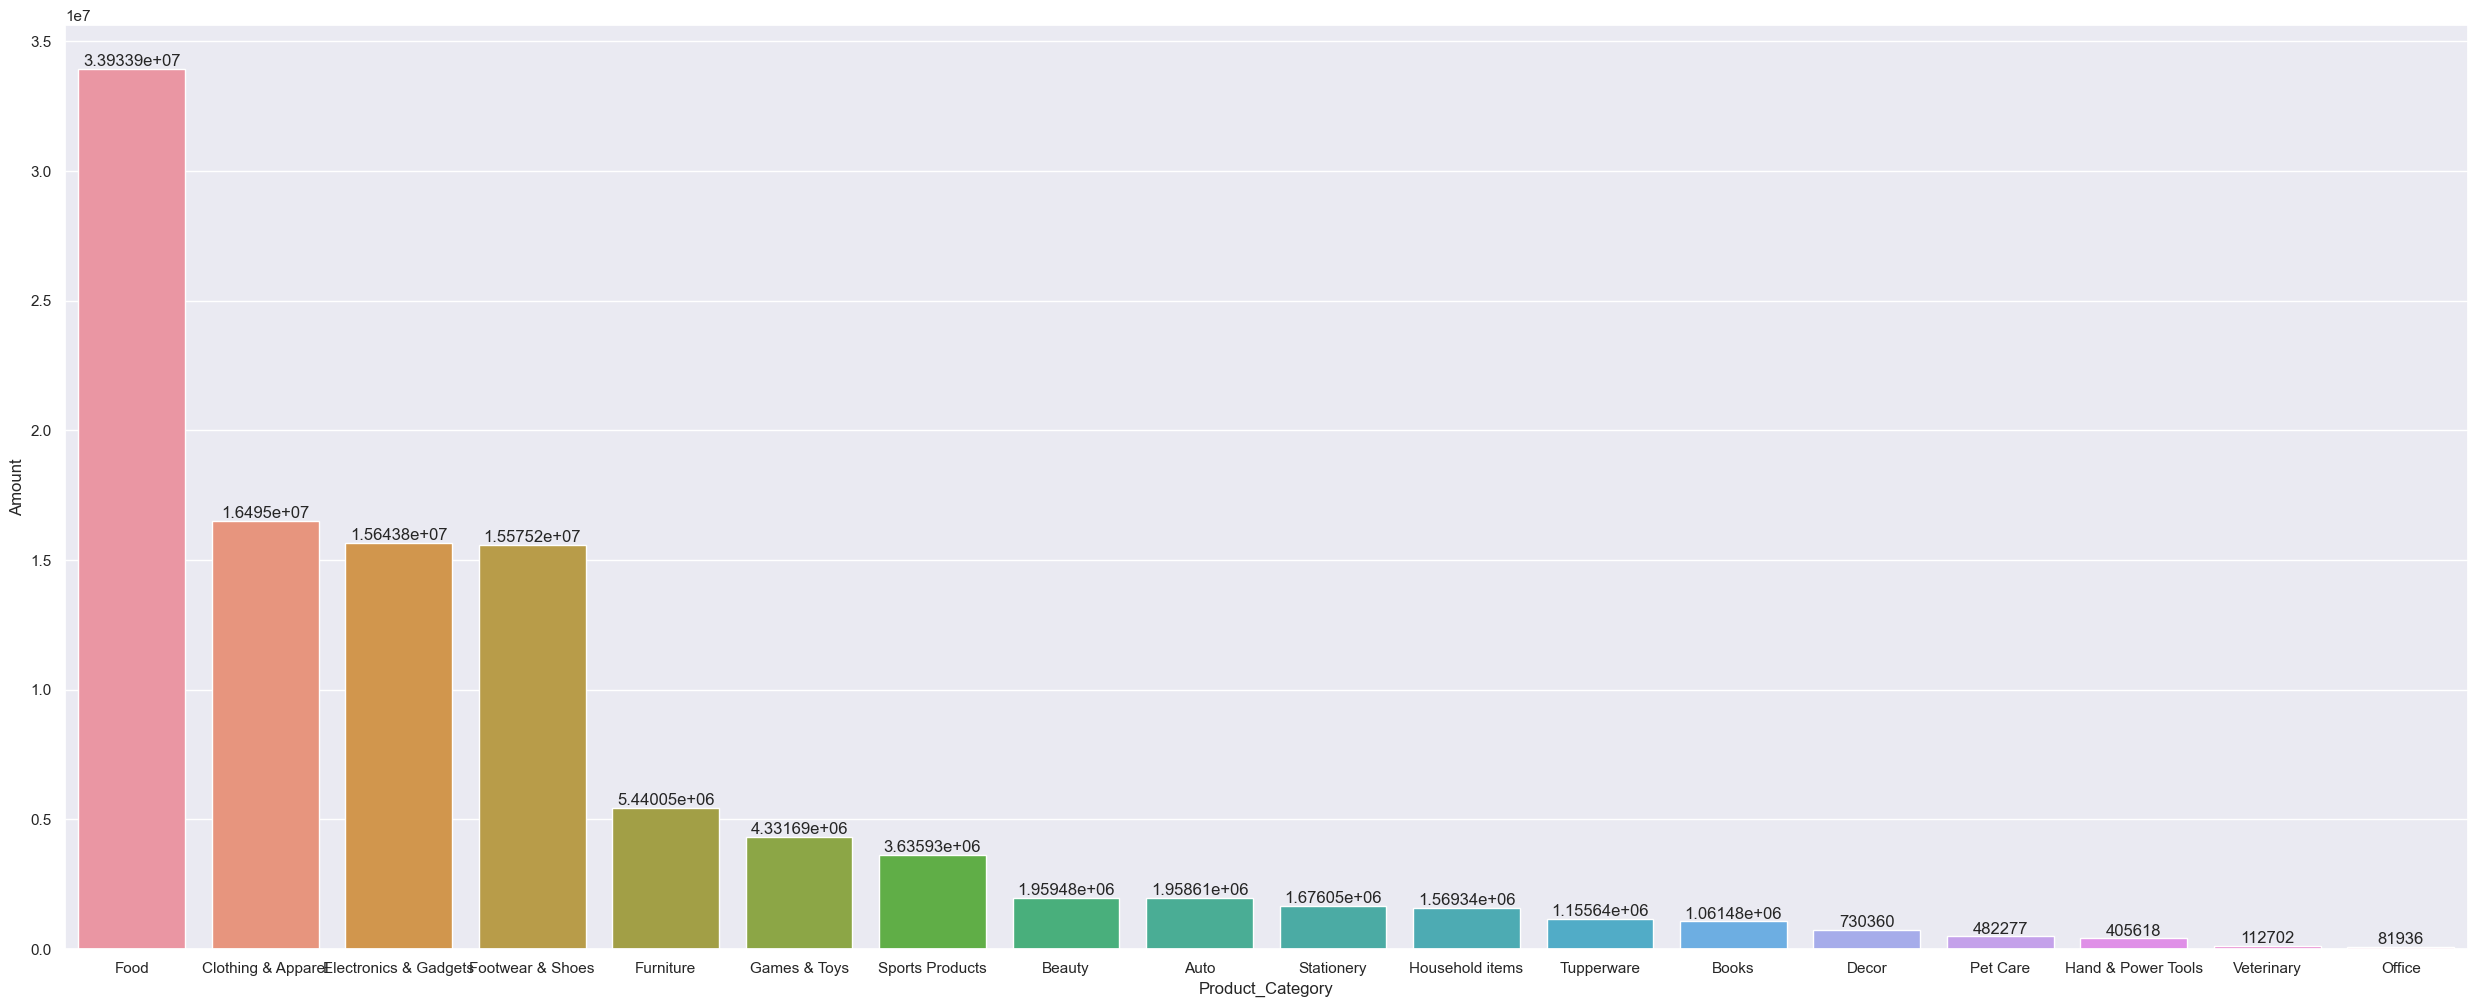

In [32]:
#Amount VS Product_Category

pram=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
ak=sns.barplot(x="Product_Category", y="Amount", data=pram)

sns.set(rc={'figure.figsize':(31,12)})
for bars in ak.containers:
    ak.bar_label(bars)

*The top 5 Amount/Sales Product categories are Food, Clothing, Electronics, Footwear & Furniture*

*The least Amount contributing Product category is Office*